## Import libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor,AdaBoostRegressor, GradientBoostingRegressor
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

df=pd.read_csv("marketing_campaign.csv")

## Data Cleaning and Manipulation

In [2]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


**Checking for anomalies**

In [3]:
pd.set_option('display.max_rows', 100)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

<Axes: xlabel='Income', ylabel='Count'>

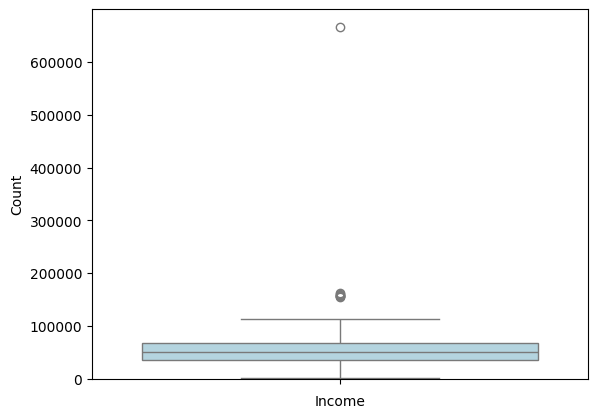

In [6]:
#Analysing the null values on "Income"
df["Income"].nunique()
df["Income"].describe()
sns.histplot(df["Income"], kde = True)
sns.boxplot(data = df["Income"], color = "lightblue")

In [7]:
# Replacing the null values of "Income" with the median value
df["Income"].fillna(df["Income"].median(),inplace=True)

C:\Users\ruijr\AppData\Local\Temp\ipykernel_17072\861640665.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Income"].fillna(df["Income"].median(),inplace=True)


In [8]:
# Checking if there are no more null values
# df.isnull().sum()

In [9]:
# Checking for duplicates
df.duplicated().sum()

0

In [10]:
# Filtering columns
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [11]:
df_filter = df.drop(columns=['NumDealsPurchases','AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2','Complain','Z_CostContact','Z_Revenue', 'Response','ID'])

In [12]:
df_filter

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
0,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,8,10,4,7
1,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,1,1,2,5
2,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,8,2,10,4
3,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,0,4,6
4,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,3,6,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,9,3,4,5
2236,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,30,0,0,8,8,2,5,7
2237,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,2,3,13,6
2238,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,214,80,30,61,6,5,10,3


In [13]:
df_filter.select_dtypes("object")

,Education,Marital_Status,Dt_Customer
0,Graduation,Single,04-09-2012
1,Graduation,Single,08-03-2014
2,Graduation,Together,21-08-2013
3,Graduation,Together,10-02-2014
4,PhD,Married,19-01-2014
...,...,...,...
2235,Graduation,Married,13-06-2013
2236,PhD,Together,10-06-2014
2237,Graduation,Divorced,25-01-2014
2238,Master,Together,24-01-2014


In [14]:
# Label Encoding for the "Education"
df_filter["Education"].value_counts()

Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64

In [15]:
df_filter["Education_label"] = df_filter["Education"].apply(lambda x: 0 if x=="Basic" else 1 if x=="2n Cycle" else 2 if x=="Graduation" else 3 if x=="Master" else 4 )

In [16]:
df_filter["Education_label"].value_counts()

Education_label
2    1127
4     486
3     370
1     203
0      54
Name: count, dtype: int64

In [17]:
# Dummies for the "Marital Status"
df_filter["Marital_Status"].value_counts()

Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [18]:
df_filter["Marital_Status"] = df_filter["Marital_Status"].apply(lambda x: "Single" if x=="Alone" else "Single" if x=="Absurd" else "Single" if x=="YOLO" else x)

In [19]:
df_filter["Marital_Status"].value_counts()

Marital_Status
Married     864
Together    580
Single      487
Divorced    232
Widow        77
Name: count, dtype: int64

In [20]:
dummies=pd.get_dummies(df_filter[["Marital_Status"]])
dummies

,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow
0,False,False,True,False,False
1,False,False,True,False,False
2,False,False,False,True,False
3,False,False,False,True,False
4,False,True,False,False,False
...,...,...,...,...,...
2235,False,True,False,False,False
2236,False,False,False,True,False
2237,True,False,False,False,False
2238,False,False,False,True,False


In [21]:
df_filter

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Education_label
0,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,8,10,4,7,2
1,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,1,1,2,5,2
2,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,8,2,10,4,2
3,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,0,4,6,2
4,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,3,6,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,9,3,4,5,2
2236,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,30,0,0,8,8,2,5,7,4
2237,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,2,3,13,6,2
2238,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,214,80,30,61,6,5,10,3,3


In [22]:
df_filter.columns

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'Education_label'],
      dtype='object')

In [23]:
# Preparing the features DF
features_0=df_filter.drop(columns = ['Education','Marital_Status','Dt_Customer','MntWines', 'MntFruits','MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds'])
features = pd.merge(features_0,dummies, left_index=True, right_index=True)

In [24]:
features

,Year_Birth,Income,Kidhome,Teenhome,Recency,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Education_label,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow
0,1957,58138.0,0,0,58,8,10,4,7,2,False,False,True,False,False
1,1954,46344.0,1,1,38,1,1,2,5,2,False,False,True,False,False
2,1965,71613.0,0,0,26,8,2,10,4,2,False,False,False,True,False
3,1984,26646.0,1,0,26,2,0,4,6,2,False,False,False,True,False
4,1981,58293.0,1,0,94,5,3,6,5,4,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,61223.0,0,1,46,9,3,4,5,2,False,True,False,False,False
2236,1946,64014.0,2,1,56,8,2,5,7,4,False,False,False,True,False
2237,1981,56981.0,0,0,91,2,3,13,6,2,True,False,False,False,False
2238,1956,69245.0,0,1,8,6,5,10,3,3,False,False,False,True,False


In [25]:
# Preparing the targets df

targets_df = df_filter[['MntWines', 'MntFruits','MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds']]

In [26]:
targets_df

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,635,88,546,172,88,88
1,11,1,6,2,1,6
2,426,49,127,111,21,42
3,11,4,20,10,3,5
4,173,43,118,46,27,15
...,...,...,...,...,...,...
2235,709,43,182,42,118,247
2236,406,0,30,0,0,8
2237,908,48,217,32,12,24
2238,428,30,214,80,30,61


In [27]:
targets_df['Sum']=df[['MntWines', 'MntFruits','MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds']]. sum(axis=1)

C:\Users\ruijr\AppData\Local\Temp\ipykernel_17072\900554904.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  targets_df['Sum']=df[['MntWines', 'MntFruits','MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds']]. sum(axis=1)


In [28]:
targets_df

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Sum
0,635,88,546,172,88,88,1617
1,11,1,6,2,1,6,27
2,426,49,127,111,21,42,776
3,11,4,20,10,3,5,53
4,173,43,118,46,27,15,422
...,...,...,...,...,...,...,...
2235,709,43,182,42,118,247,1341
2236,406,0,30,0,0,8,444
2237,908,48,217,32,12,24,1241
2238,428,30,214,80,30,61,843


**Quick EDA**

In [29]:
# Getting just a series for the target
targets_df_sum= targets_df.drop(columns=['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts','MntSweetProducts', 'MntGoldProds'])

In [30]:
# DF with the features and the target
corr_features =pd.merge(features,targets_df_sum,left_index=True,right_index=True)

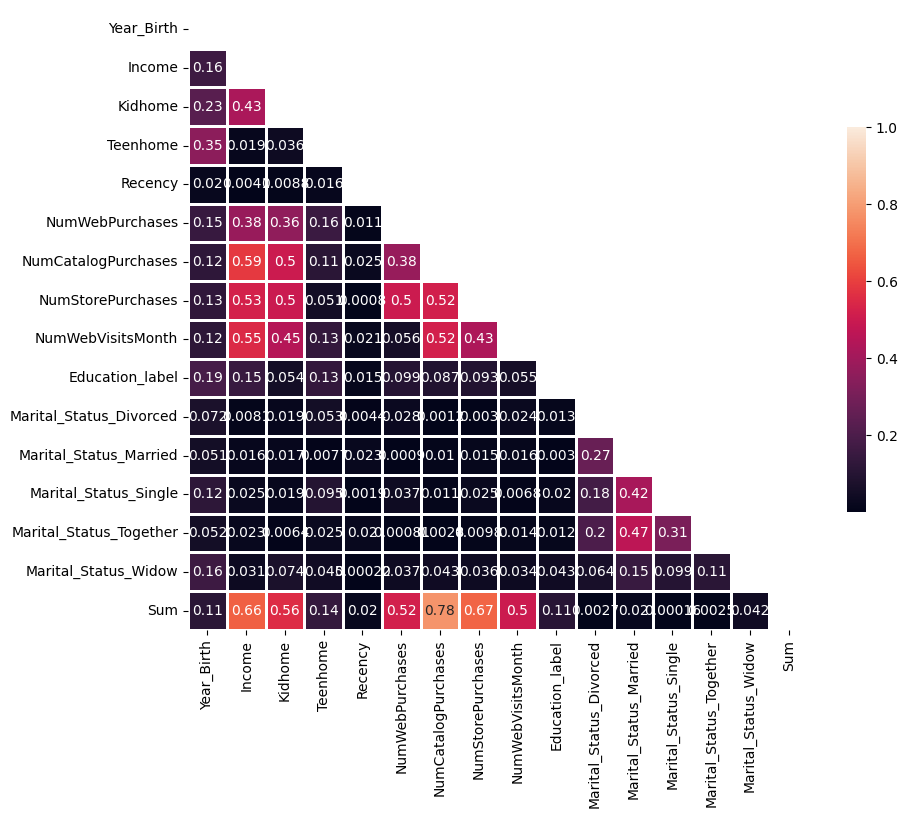

In [31]:
# Heatmap with correlations

corr=np.abs(corr_features.corr())

#Set up mask for triangle representation
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,  vmax=1,square=True, linewidths=.8, cbar_kws={"shrink": .5},annot = corr)

plt.show()

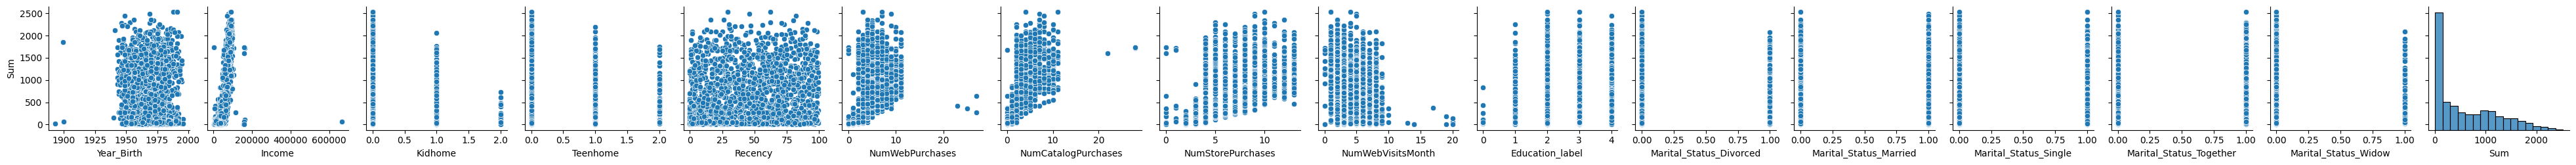

In [32]:
# Pair plot of features against target
sns.pairplot(corr_features, y_vars= ["Sum"], x_vars =corr_features)

**Features subset iteration definition**

In [33]:
# Iteration 0 - Considering all features

features

# Iteration 1 - Remove the following features: 'NumWebVisitsMonth', 'Marital_Status_Divorced','Marital_Status_Married', 'Marital_Status_Single','Marital_Status_Together', 'Marital_Status_Widow'
features_v1 = features.drop(columns=['NumWebVisitsMonth', 'Marital_Status_Divorced','Marital_Status_Married', 'Marital_Status_Single','Marital_Status_Together', 'Marital_Status_Widow'])

# Iteration 2 - Remove the following features: 
features_v2 = features_v1.drop(columns=["Recency"])

In [34]:
# first we checked the values for the "features", then we standardized it, then I did filter some features and decided to use the "features_v2".
# I ended up using the original features since the correlation between all them is lower than 0.9.

## Train Test Split & Normalizer

**Train Test Split**

In [35]:
X_train, X_test, y_train, y_test = train_test_split(features, targets_df["Sum"], test_size=0.2, random_state= None)

**Normalizer**

In [36]:
# Create an instance of the normalizer
normalizer = StandardScaler()

# Fit it to our training data
normalizer.fit(X_train)

# Transforming our train and test data
X_train_norm = normalizer.transform(X_train)
X_test_norm = normalizer.transform(X_test)


## KNN - Regressor

In [37]:
# Creating instance of KNN with hyperparameter
knn = KNeighborsRegressor(n_neighbors=10)

# training our model with the normalized data
knn.fit(X_train_norm, y_train)

KNeighborsRegressor(n_neighbors=10)

In [38]:
# Evaluate the model

# predictions for the test set
pred = knn.predict(X_test_norm)

# Evaluate R2 & RMSE
print("R2_score", knn.score(X_test_norm, y_test))
print("RMSE: ", np.sqrt(mean_squared_error(y_test, pred)))

R2_score 0.7877465050609187
RMSE:  280.7245850187129


In [39]:
# comparing to the train sample
knn.score(X_train_norm, y_train)  # all indicates that the model is not overfitted.
# The r2 is not 1.0 and the test and train samples are close (less than 5% accuracy difference)

0.8272621172584461

In [40]:
targets_df["Sum"].describe() # just to evaluate where does this value fit within the range of the series

count    2240.000000
mean      605.798214
std       602.249288
min         5.000000
25%        68.750000
50%       396.000000
75%      1045.500000
max      2525.000000
Name: Sum, dtype: float64

## Linear Regression

In [41]:
# Creating instance of linear regression
lin_reg = LinearRegression()

# training our model with the normalized data
lin_reg.fit(X_train_norm,y_train)

LinearRegression()

In [42]:
# Evaluate the model

# predictions for the test set
pred = lin_reg.predict(X_test_norm)

# Evaluate R2 & RMSE
print("R2_score", lin_reg.score(X_test_norm, y_test))
print("RMSE: ", np.sqrt(mean_squared_error(y_test, pred)))

R2_score 0.7734572602025775
RMSE:  290.02009987974185


In [43]:
# comparing to the train sample
lin_reg.score(X_train_norm, y_train) # Check: R2 != 1.0 & diff. between test and train < 5%

0.7665532299321997

In [44]:
# Evaluate the feature interference on the target
{feature: coef for feature, coef in zip(features.columns, lin_reg.coef_)}

{'Year_Birth': -2.9007659738755933,
 'Income': 105.21102308397046,
 'Kidhome': -59.777357739044916,
 'Teenhome': -79.94238381147719,
 'Recency': 13.213536979975967,
 'NumWebPurchases': 107.0712941720244,
 'NumCatalogPurchases': 249.18215315479046,
 'NumStorePurchases': 129.58125770939134,
 'NumWebVisitsMonth': -16.58861477003061,
 'Education_label': 13.69116542150602,
 'Marital_Status_Divorced': -0.1169544913383604,
 'Marital_Status_Married': -5.918565771214245,
 'Marital_Status_Single': 6.916134007727194,
 'Marital_Status_Together': 1.0301916557059176,
 'Marital_Status_Widow': -2.3244825887380407}

## Decision Trees

In [45]:
# Creating instance of regression
tree = DecisionTreeRegressor(max_depth=5)

# training our model with the normalized data
tree.fit(X_train_norm,y_train)

DecisionTreeRegressor(max_depth=5)

In [46]:
# Evaluate the model

# predictions for the test set
pred = tree.predict(X_test_norm)

# Evaluate R2 & RMSE
print("R2_score", tree.score(X_test_norm, y_test))
print("RMSE: ", np.sqrt(mean_squared_error(y_test, pred)))


R2_score 0.8243453671918877
RMSE:  255.37761563191515


In [47]:
# comparing to the train sample
tree.score(X_train_norm, y_train) # Check: R2 != 1.0 & diff. between test and train < 5%


0.8737164102063515

In [48]:
# decision trees are varying a lot, so we checked the ideal depth after standardizing, and after that the values keep within the 5% range
# in the beggining I checked the ideal depth according to the un-standardize data

In [49]:
# just to help decide the depth

# for i in range(2,20):
#     tree = DecisionTreeRegressor(max_depth=i)
#     tree.fit(X_train_norm,y_train)

#     tree.score(X_test_norm, y_test)
#     print(tree.score(X_test_norm, y_test))

## Ensemble Methods

**Bagging**

In [50]:
# Creating instance of regression
bagging_reg = BaggingRegressor(DecisionTreeRegressor(max_depth = 5), 
                               n_estimators = 100, 
                               max_samples = 1000, 
                               bootstrap=True)

In [51]:
# training our model with the normalized data
bagging_reg.fit(X_train_norm, y_train)

BaggingRegressor(estimator=DecisionTreeRegressor(max_depth=5), max_samples=1000,
                 n_estimators=100)

In [52]:
# Evaluate the model

# predictions for the test set
pred = bagging_reg.predict(X_test_norm)

# Evaluate R2 & RMSE
print("R2_score", bagging_reg.score(X_test_norm, y_test))
print("RMSE:", np.sqrt(mean_squared_error(y_test, pred)))

R2_score 0.8514428878818596
RMSE: 234.85496595176312


In [53]:
# check for overfiting
bagging_reg.score(X_train_norm, y_train) # is is not overfiting

0.8895663580743377

**Pasting**

In [54]:
# Creating instance of regression
pasting_reg = BaggingRegressor(DecisionTreeRegressor(max_depth = 5), 
                               n_estimators = 100, # we reduce the number of estimators in order for the samples for each tree to be higher, since it doesn't re uses them
                               max_samples = 1000, 
                               bootstrap=False)

In [55]:
# training our model with the normalized data
pasting_reg.fit(X_train_norm, y_train)

BaggingRegressor(bootstrap=False, estimator=DecisionTreeRegressor(max_depth=5),
                 max_samples=1000, n_estimators=100)

In [56]:
# Evaluate the model

# predictions for the test set
pred = pasting_reg.predict(X_test_norm)

# Evaluate R2 & RMSE
print("R2_score", pasting_reg.score(X_test_norm, y_test))
print("RMSE:", np.sqrt(mean_squared_error(y_test, pred)))

R2_score 0.8527310709849706
RMSE: 233.83450015594772


In [57]:
# check for overfiting
pasting_reg.score(X_train_norm, y_train) # the train is higher and the difference as well

0.8930844385645538

**Random Patches Method - Random Forests**

In [58]:
# Creating instance of regression
forest = RandomForestRegressor(n_estimators=100,  # # of trees
                               max_depth=5)

In [59]:
# training our model with the normalized data
forest.fit(X_train_norm, y_train)

RandomForestRegressor(max_depth=5)

In [60]:
# Evaluate the model

# predictions for the test set
pred = forest.predict(X_test_norm)

# Evaluate R2 & RMSE
print("R2_score", forest.score(X_test_norm, y_test))
print("RMSE:", np.sqrt(mean_squared_error(y_test, pred)))

R2_score 0.8500748154509351
RMSE: 235.93388526793606


In [61]:
# check for overfiting
forest.score(X_train_norm, y_train)

0.8924545788605708

**Boosting**

AdaBoost

In [62]:
# ITERATION 1 - Creating instance of regression with Decision Tree
ada_reg = AdaBoostRegressor(DecisionTreeRegressor(max_depth=5),
                            n_estimators=100)

In [63]:
# ITERATION 2 - Creating instance of regression with Random Forest
ada_reg = AdaBoostRegressor(RandomForestRegressor(max_depth=5),
                            n_estimators=100)

In [64]:
# training our model with the normalized data
ada_reg.fit(X_train_norm, y_train)

AdaBoostRegressor(estimator=RandomForestRegressor(max_depth=5),
                  n_estimators=100)

In [65]:
# Evaluate the model

# predictions for the test set
pred = ada_reg.predict(X_test_norm)

# Evaluate R2 & RMSE
print("R2_score", ada_reg.score(X_test_norm, y_test))
print("RMSE:", np.sqrt(mean_squared_error(y_test, pred)))

R2_score 0.852752323244878
RMSE: 233.81762731350437


In [66]:
# check for overfiting
ada_reg.score(X_train_norm, y_train)

0.9000002400990917

Gradient Boosting

In [67]:
# Creating instance of regression
gb_reg = GradientBoostingRegressor(n_estimators=100,
                                   max_depth=5)

In [68]:
# training our model with the normalized data
gb_reg.fit(X_train_norm, y_train)

GradientBoostingRegressor(max_depth=5)

In [69]:
# Evaluate the model

# predictions for the test set
pred = gb_reg.predict(X_test_norm)

# Evaluate R2 & RMSE
print("R2_score", gb_reg.score(X_test_norm, y_test))
print("RMSE:", np.sqrt(mean_squared_error(y_test, pred)))

R2_score 0.871579511574656
RMSE: 218.35854016925876


In [70]:
# check for overfiting
gb_reg.score(X_train_norm, y_train)

0.9776368909640744

XGBoost

In [71]:
# Creating instance of regression
model = xgb.XGBRegressor(max_depth = 5, n_estimators =100)

In [72]:
# training our model with the normalized data
model.fit(X_train_norm, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [73]:
# Evaluate the model

# predictions for the test set
pred = model.predict(X_test_norm)

# Evaluate R2 & RMSE
print("R2_score", model.score(X_test_norm, y_test))
print("RMSE:", np.sqrt(mean_squared_error(y_test, pred)))

R2_score 0.869073748588562
RMSE: 220.47858777648995


In [74]:
# check for overfiting
model.score(X_train_norm, y_train)  # it is overfiting

0.9953897595405579

## Hyperparameter tunning and Cross Validation with Random Forests

So looking at all the outcomes, the Random Forests yields the higher R2 without overfitting. We will fine tune that one

**Grid Search**

In [75]:
# Definition of the grid
grid = {"n_estimators": [20,50,100,250,500],
        "max_depth": [3,5,8,10,15,20,100]}


# so for the knowledge we had before, we want the depth to be lower. And since it was overfiting we are gonna add the min_samples_split

In [76]:
# Definition of the grid
grid_2 = {"n_estimators": [250,500,1000,2000],
        "max_depth": [3,5,8,10,15],
        "min_samples_leaf": [5,10,20,100,200]}

# Results: R2 score: 0.873745298437044; 0.9389426998095222
# {'max_depth': 15, 'min_samples_leaf': 5, 'n_estimators': 2000}
# it is still overfitting a little, so 

In [77]:
# Definition of the grid
grid_3 = {"n_estimators": [250,500,2000,3000],
        "max_depth": [3,5,8],
        "min_samples_leaf": [2,5,8,10]}

# results: R2 score: 0.8721608595412692; 0.9453359587302206
# {'max_depth': 8, 'min_samples_leaf': 2, 'n_estimators': 250}


In [78]:
# Definition of the grid
grid_4 = {"n_estimators": [250,500,2000],
        "max_depth": [3,5],
        "min_samples_leaf": [10]}

# results: R2 score: 0.8545057451750262; 0.8804960621700062
# {'max_depth': 5, 'min_samples_leaf': 10, 'n_estimators': 500}

In [79]:
# Definition of the grid
grid_5 = {"n_estimators": [100,250,500],
        "max_depth": [3,5,7],
        "min_samples_leaf": [8,10,12]}

# results: R2 score: 0.8669313688865276; 0.9075054684598605
# {'max_depth': 7, 'min_samples_leaf': 8, 'n_estimators': 250}

In [101]:
# Definition of the grid
grid_6 = {"n_estimators": [250],
        "max_depth": [7],
        "min_samples_leaf": [8]}

# results: R2 score: 0.8669313688865276; 0.9075054684598605
# {'max_depth': 7, 'min_samples_leaf': 8, 'n_estimators': 250}

In [102]:
# Estimator to use
forest = RandomForestRegressor()

In [103]:
# Creating instance of regression
model = GridSearchCV(estimator=forest, param_grid=grid_6, cv=5)

# training our model with the normalized data
model.fit(X_train_norm, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [7], 'min_samples_leaf': [8],
                         'n_estimators': [250]})

In [104]:
# best params values
model.best_params_

{'max_depth': 7, 'min_samples_leaf': 8, 'n_estimators': 250}

In [105]:
# to see the test scores, by default r2 since it is a regression problem
# model.cv_results_

In [106]:
# Retrieve the best model
best_model = model.best_estimator_

In [107]:
# predictions for the test set
pred = best_model.predict(X_test_norm)

# Evaluate R2 & RMSE
print("R2 score:", best_model.score(X_test_norm, y_test))
print("RMSE:", np.sqrt(mean_squared_error(y_test,pred)))

R2 score: 0.8591733706597924
RMSE: 228.6627466425276


In [108]:
# check for overfiting
best_model.score(X_train_norm, y_train)

0.90623095827284

FINAL

In [109]:
best_model.predict(X_test_norm)

array([  48.72240061,  523.59589839,   59.85265013,   75.42708177,
         38.73083369,  804.93089246, 1406.92363862,   91.87337586,
        194.89987836, 1585.71798477,  327.55616782,   45.65385909,
        418.44121623,  252.76569031,   65.67313913,   70.93555621,
       1003.92370689,   43.99189227, 1378.38544964,   32.57513513,
         32.65250929,   32.46044317, 1214.77568883,   50.99787445,
       1548.541773  , 1520.77141056, 1233.01759532, 1178.10498121,
       1545.18358162, 1148.33653113,  924.56744772,  112.45290643,
       1078.5862923 ,   59.0509536 , 1259.8212654 ,  861.64910751,
       1010.17805521,   55.96207952,  124.33331321,  123.90134367,
        930.46697924, 1096.67898346, 1251.90437119,  105.54294601,
         56.96571531, 1495.74403125,  267.42384756,  291.35258954,
        482.86238083,   73.14617703,   75.32322124,  537.25035032,
         75.75784793, 1365.16013993, 1409.50256321,  110.99684289,
       1280.12123234,   44.61955744,   44.2804839 , 1361.19816

In [110]:
y_test

384       19
1970     982
177       45
1629      78
206       53
        ... 
1739      42
520       52
51      1693
363       25
1719     877
Name: Sum, Length: 448, dtype: int64

**Random Search**

In [88]:
# Definition of the grid
grid = {"n_estimators": [int(x) for x in np.linspace(start=100, stop=2000, num=10)],  # 10 values equally spaced between the star and stop 
        "max_depth": [int(x) for x in np.linspace(start=5, stop=15, num=10)],
        "min_samples_leaf": [int(x) for x in np.linspace(start=2, stop=15, num=3)]}

#Results: R2 score: 0.8749162835147323;0.9629646722391496
# {'n_estimators': 522, 'min_samples_leaf': 2, 'max_depth': 10}

In [89]:
# Definition of the grid
grid_2 = {"n_estimators": [int(x) for x in np.linspace(start=100, stop=1000, num=10)],  # 10 values equally spaced between the star and stop 
        "max_depth": [int(x) for x in np.linspace(start=5, stop=8, num=4)],
        "min_samples_leaf": [int(x) for x in np.linspace(start=2, stop=15, num=4)]}

#Results: R2 score: 0.8649708578062872; 0.9021375605245706
# {'n_estimators': 400, 'min_samples_leaf': 10, 'max_depth': 7}

In [90]:
# Definition of the grid
grid_3 = {"n_estimators": [int(x) for x in np.linspace(start=100, stop=1000, num=10)],  # 10 values equally spaced between the star and stop 
        "max_depth": [int(x) for x in np.linspace(start=4, stop=7, num=4)],
        "min_samples_leaf": [int(x) for x in np.linspace(start=5, stop=15, num=4)]}

# n_iter = 5
#Results: R2 score: 0.8656678260341106;  0.9077629246191589
# {'n_estimators': 700, 'min_samples_leaf': 8, 'max_depth': 7}

# n_iter = 8
#Results: R2 score: 0.8663225786002642;  0.9076083205190751
# {'n_estimators': 400, 'min_samples_leaf': 8, 'max_depth': 7}

# n_iter =5
#Results: R2 score: 0.8638941621271639;  0.8991713904360766
# {'n_estimators': 300, 'min_samples_leaf': 11, 'max_depth': 7}

In [91]:
# Estimator to use
forest = RandomForestRegressor()

In [92]:
# Creating instance of regression
model = RandomizedSearchCV(forest, param_distributions = grid_3, cv=5, n_iter =5)


# training our model with the normalized data
model.fit(X_train_norm,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=5,
                   param_distributions={'max_depth': [4, 5, 6, 7],
                                        'min_samples_leaf': [5, 8, 11, 15],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000]})

In [93]:
# best params values
model.best_params_

{'n_estimators': 600, 'min_samples_leaf': 11, 'max_depth': 6}

In [94]:
# Retrieve the best model
best_model = model.best_estimator_

In [95]:
# predictions for the test set
pred = best_model.predict(X_test_norm)

# Evaluate R2 & RMSE
print("R2 score:", best_model.score(X_test_norm, y_test))
print("RMSE:", np.sqrt(mean_squared_error(y_test,pred)))

R2 score: 0.8527130368359889
RMSE: 233.84881708331395


In [96]:
best_model.score(X_train_norm, y_train)

0.8909930227423044

## Hyperparameter tunning and Cross Validation with AdaBoost using Random Forests

In [97]:
# Definition of the grid
grid = {"n_estimators": [100,250,500],
        "estimator__max_depth": [3,5,7],
        "estimator__min_samples_leaf": [8,10,12]}

# results: R2 score: 0.8468367419367575; 0.8954986850654175
# # {'estimator__max_depth': 5,
#  'estimator__min_samples_leaf': 10,
#  'n_estimators': 500}

In [98]:
# Definition of the grid
grid_2 = {"n_estimators": [100,250,500],
        "estimator__max_depth": [3,5,6,7],
        "estimator__min_samples_leaf": [7,8,9,10]}

# results: R2 score: 0.8521414269826522; 0.9207943744234623
# # {'estimator__max_depth': 6,
#  'estimator__min_samples_leaf': 7,
#  'n_estimators': 100}

In [99]:
# Estimator to use
ada_reg = AdaBoostRegressor(RandomForestRegressor())

In [100]:
# Creating instance of regression
model = GridSearchCV(estimator=ada_reg, param_grid=grid_2, cv=5)

# training our model with the normalized data
model.fit(X_train_norm, y_train)

KeyboardInterrupt: 

In [ ]:
# best params values
model.best_params_

{'estimator__max_depth': 6,
 'estimator__min_samples_leaf': 7,
 'n_estimators': 100}

In [ ]:
# to see the test scores, by default r2 since it is a regression problem
# model.cv_results_

In [ ]:
# Retrieve the best model
best_model = model.best_estimator_

In [ ]:
# predictions for the test set
pred = best_model.predict(X_test_norm)

# Evaluate R2 & RMSE
print("R2 score:", best_model.score(X_test_norm, y_test))
print("RMSE:", np.sqrt(mean_squared_error(y_test,pred)))

R2 score: 0.8521414269826522
RMSE: 233.90543909389467


In [ ]:
# check for overfiting
best_model.score(X_train_norm, y_train)

0.9207943744234623

In [ ]:
# analisar K means